## The Dataset

### Description
This dataset contains details of individual relating to their health. The target is stored in **strokes** column which is binary variable indicating either 0 or 1. The goal of the project is a binary classification task to predict wether the person will get a stroke depending on other health factors

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, brier_score_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import xgboost as xgb
import time

##Decision Trees

**Load the provided dataset**

In [13]:
healthcare_stroke_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/StrokePrediction/Data/healthcare-dataset-stroke-data.csv')
healthcare_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Show % of missing values in each column**

In [14]:
print(len(healthcare_stroke_df))
for col in healthcare_stroke_df.columns:
  nan_count = healthcare_stroke_df[col].isna().sum()
  ans = round(nan_count / len(healthcare_stroke_df) * 100, 2)
  print("Percent of missing values in column", col, ":", ans)

5110
Percent of missing values in column id : 0.0
Percent of missing values in column gender : 0.0
Percent of missing values in column age : 0.0
Percent of missing values in column hypertension : 0.0
Percent of missing values in column heart_disease : 0.0
Percent of missing values in column ever_married : 0.0
Percent of missing values in column work_type : 0.0
Percent of missing values in column Residence_type : 0.0
Percent of missing values in column avg_glucose_level : 0.0
Percent of missing values in column bmi : 3.93
Percent of missing values in column smoking_status : 0.0
Percent of missing values in column stroke : 0.0


In [15]:
healthcare_stroke_df = healthcare_stroke_df.drop(['bmi'], axis=1)
print(healthcare_stroke_df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   smoking_status  stroke  
0           Private          Urban             228.69  formerly sm

**Check for the number of rows after handling null values, each column should have the same number of non-null count**

In [16]:
print("Number of rows:", healthcare_stroke_df.shape[0])
print("Number of non-null values for each column:")
print(healthcare_stroke_df.count())

Number of rows: 5110
Number of non-null values for each column:
id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
smoking_status       5110
stroke               5110
dtype: int64


In [17]:
total = len(healthcare_stroke_df)
#print(total)
print("Probability of patient having a stroke:", len(healthcare_stroke_df[healthcare_stroke_df['stroke'] == 1])/total)
print("Probability of patient not having a stroke: ", len(healthcare_stroke_df[healthcare_stroke_df['stroke'] == 0])/total)

Probability of patient having a stroke: 0.0487279843444227
Probability of patient not having a stroke:  0.9512720156555773


As we can see, the dataset is not balanced. There are a lot of more people who have had strokes in the dataset than people who have not had strokes.

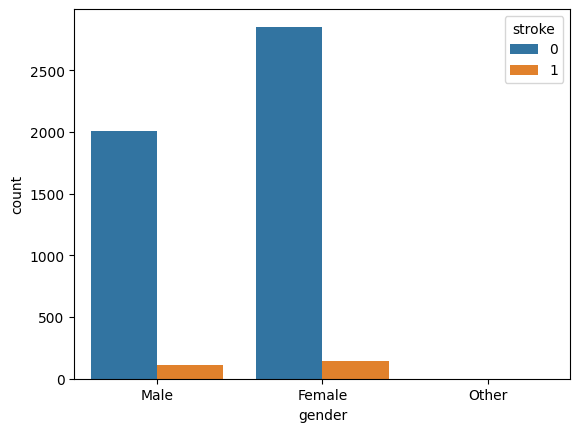

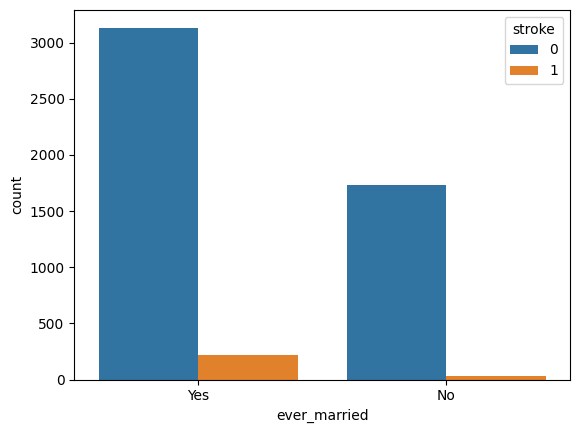

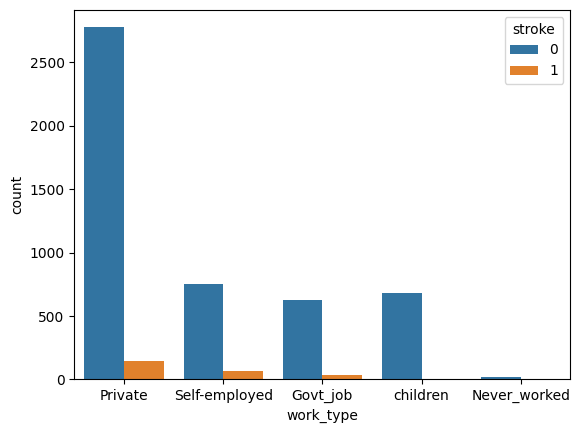

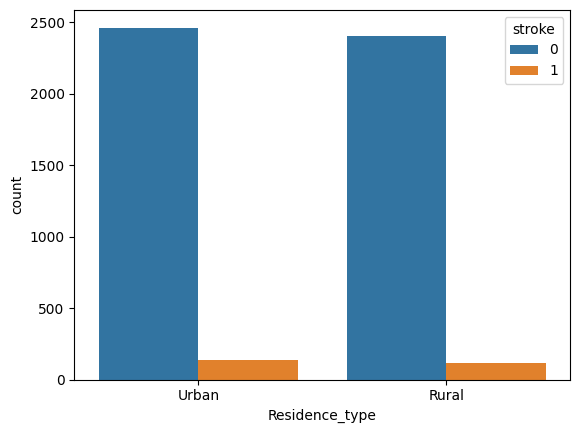

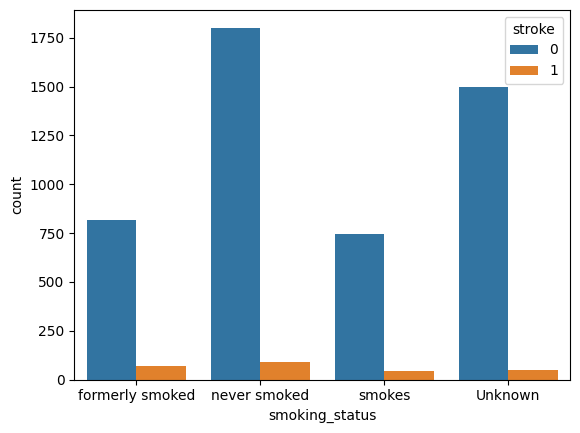

In [18]:
#sns.barplot(data=healthcare_stroke_df, x="gender", y="count", hue="holiday")
sns.countplot(data=healthcare_stroke_df, x="gender", hue="stroke")
plt.show()
sns.countplot(data=healthcare_stroke_df, x="ever_married", hue="stroke")
plt.show()
sns.countplot(data=healthcare_stroke_df, x="work_type", hue="stroke")
plt.show()
sns.countplot(data=healthcare_stroke_df, x="Residence_type", hue="stroke")
plt.show()
sns.countplot(data=healthcare_stroke_df, x="smoking_status", hue="stroke")
plt.show()

**Preprocess the data (Handle the Categorical Variable)**

In [19]:
df_X = healthcare_stroke_df.drop(columns=['stroke','id'])
df_Y = healthcare_stroke_df['stroke'].astype(int)

## YOUR CODE HERE

ord_enc = OrdinalEncoder()
df_X["gender_code"] = ord_enc.fit_transform(df_X[["gender"]])
df_X["ever_married_code"] = ord_enc.fit_transform(df_X[["ever_married"]])
df_X["work_type_code"] = ord_enc.fit_transform(df_X[["work_type"]])
df_X["Residence_type_code"] = ord_enc.fit_transform(df_X[["Residence_type"]])
df_X["smoking_status_code"] = ord_enc.fit_transform(df_X[["smoking_status"]])
df_X = df_X.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)
print(df_X)

       age  hypertension  heart_disease  avg_glucose_level  gender_code  \
0     67.0             0              1             228.69          1.0   
1     61.0             0              0             202.21          0.0   
2     80.0             0              1             105.92          1.0   
3     49.0             0              0             171.23          0.0   
4     79.0             1              0             174.12          0.0   
...    ...           ...            ...                ...          ...   
5105  80.0             1              0              83.75          0.0   
5106  81.0             0              0             125.20          0.0   
5107  35.0             0              0              82.99          0.0   
5108  51.0             0              0             166.29          1.0   
5109  44.0             0              0              85.28          0.0   

      ever_married_code  work_type_code  Residence_type_code  \
0                   1.0            

**Split the data into development and test datasets with a stratified split due to the imbalanced data**

In [20]:
x_dev, x_test, y_dev, y_test = train_test_split(df_X, df_Y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_Y)

**Fit a Decision Tree on the training data until all leaves are pure**

In [21]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_dev, y_dev)
y_dev_predict = clf.predict(x_dev)
y_test_predict = clf.predict(x_test)
print("Development Set")
print(classification_report(y_dev, y_dev_predict))
print("Test Set")
print(classification_report(y_test, y_test_predict))

Development Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      1.00      1.00       199

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088

Test Set
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



**Your Comments Here**: Since the dataset is highly imbalanced, precision and recall will be more effective at evaluating the model performance than accuracy. We can also note that the F1 score of the model on the development set is 1. This is because all leaves are pure. We see that the model performs poorly on the set. With low values for precision and recall on the minority class, we conclude that the model performs bad when predicting a stroke and when identifying all occurences of a stroke.

**Visualize the trained tree until the max_depth 8**

[Text(0.4820188492063492, 0.95, 'age <= 67.5\ngini = 0.093\nsamples = 4088\nvalue = [3889, 199]'),
 Text(0.20577050264550265, 0.85, 'age <= 47.5\ngini = 0.048\nsamples = 3395\nvalue = [3312, 83]'),
 Text(0.04861111111111111, 0.75, 'avg_glucose_level <= 223.94\ngini = 0.006\nsamples = 2191\nvalue = [2184, 7]'),
 Text(0.032407407407407406, 0.65, 'age <= 37.5\ngini = 0.005\nsamples = 2176\nvalue = [2170, 6]'),
 Text(0.015873015873015872, 0.55, 'age <= 1.36\ngini = 0.001\nsamples = 1590\nvalue = [1589, 1]'),
 Text(0.010582010582010581, 0.45, 'age <= 1.28\ngini = 0.033\nsamples = 59\nvalue = [58, 1]'),
 Text(0.005291005291005291, 0.35, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.015873015873015872, 0.35, 'Residence_type_code <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.010582010582010581, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.021164021164021163, 0.25, 'gender_code <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.015873015873015872, 0

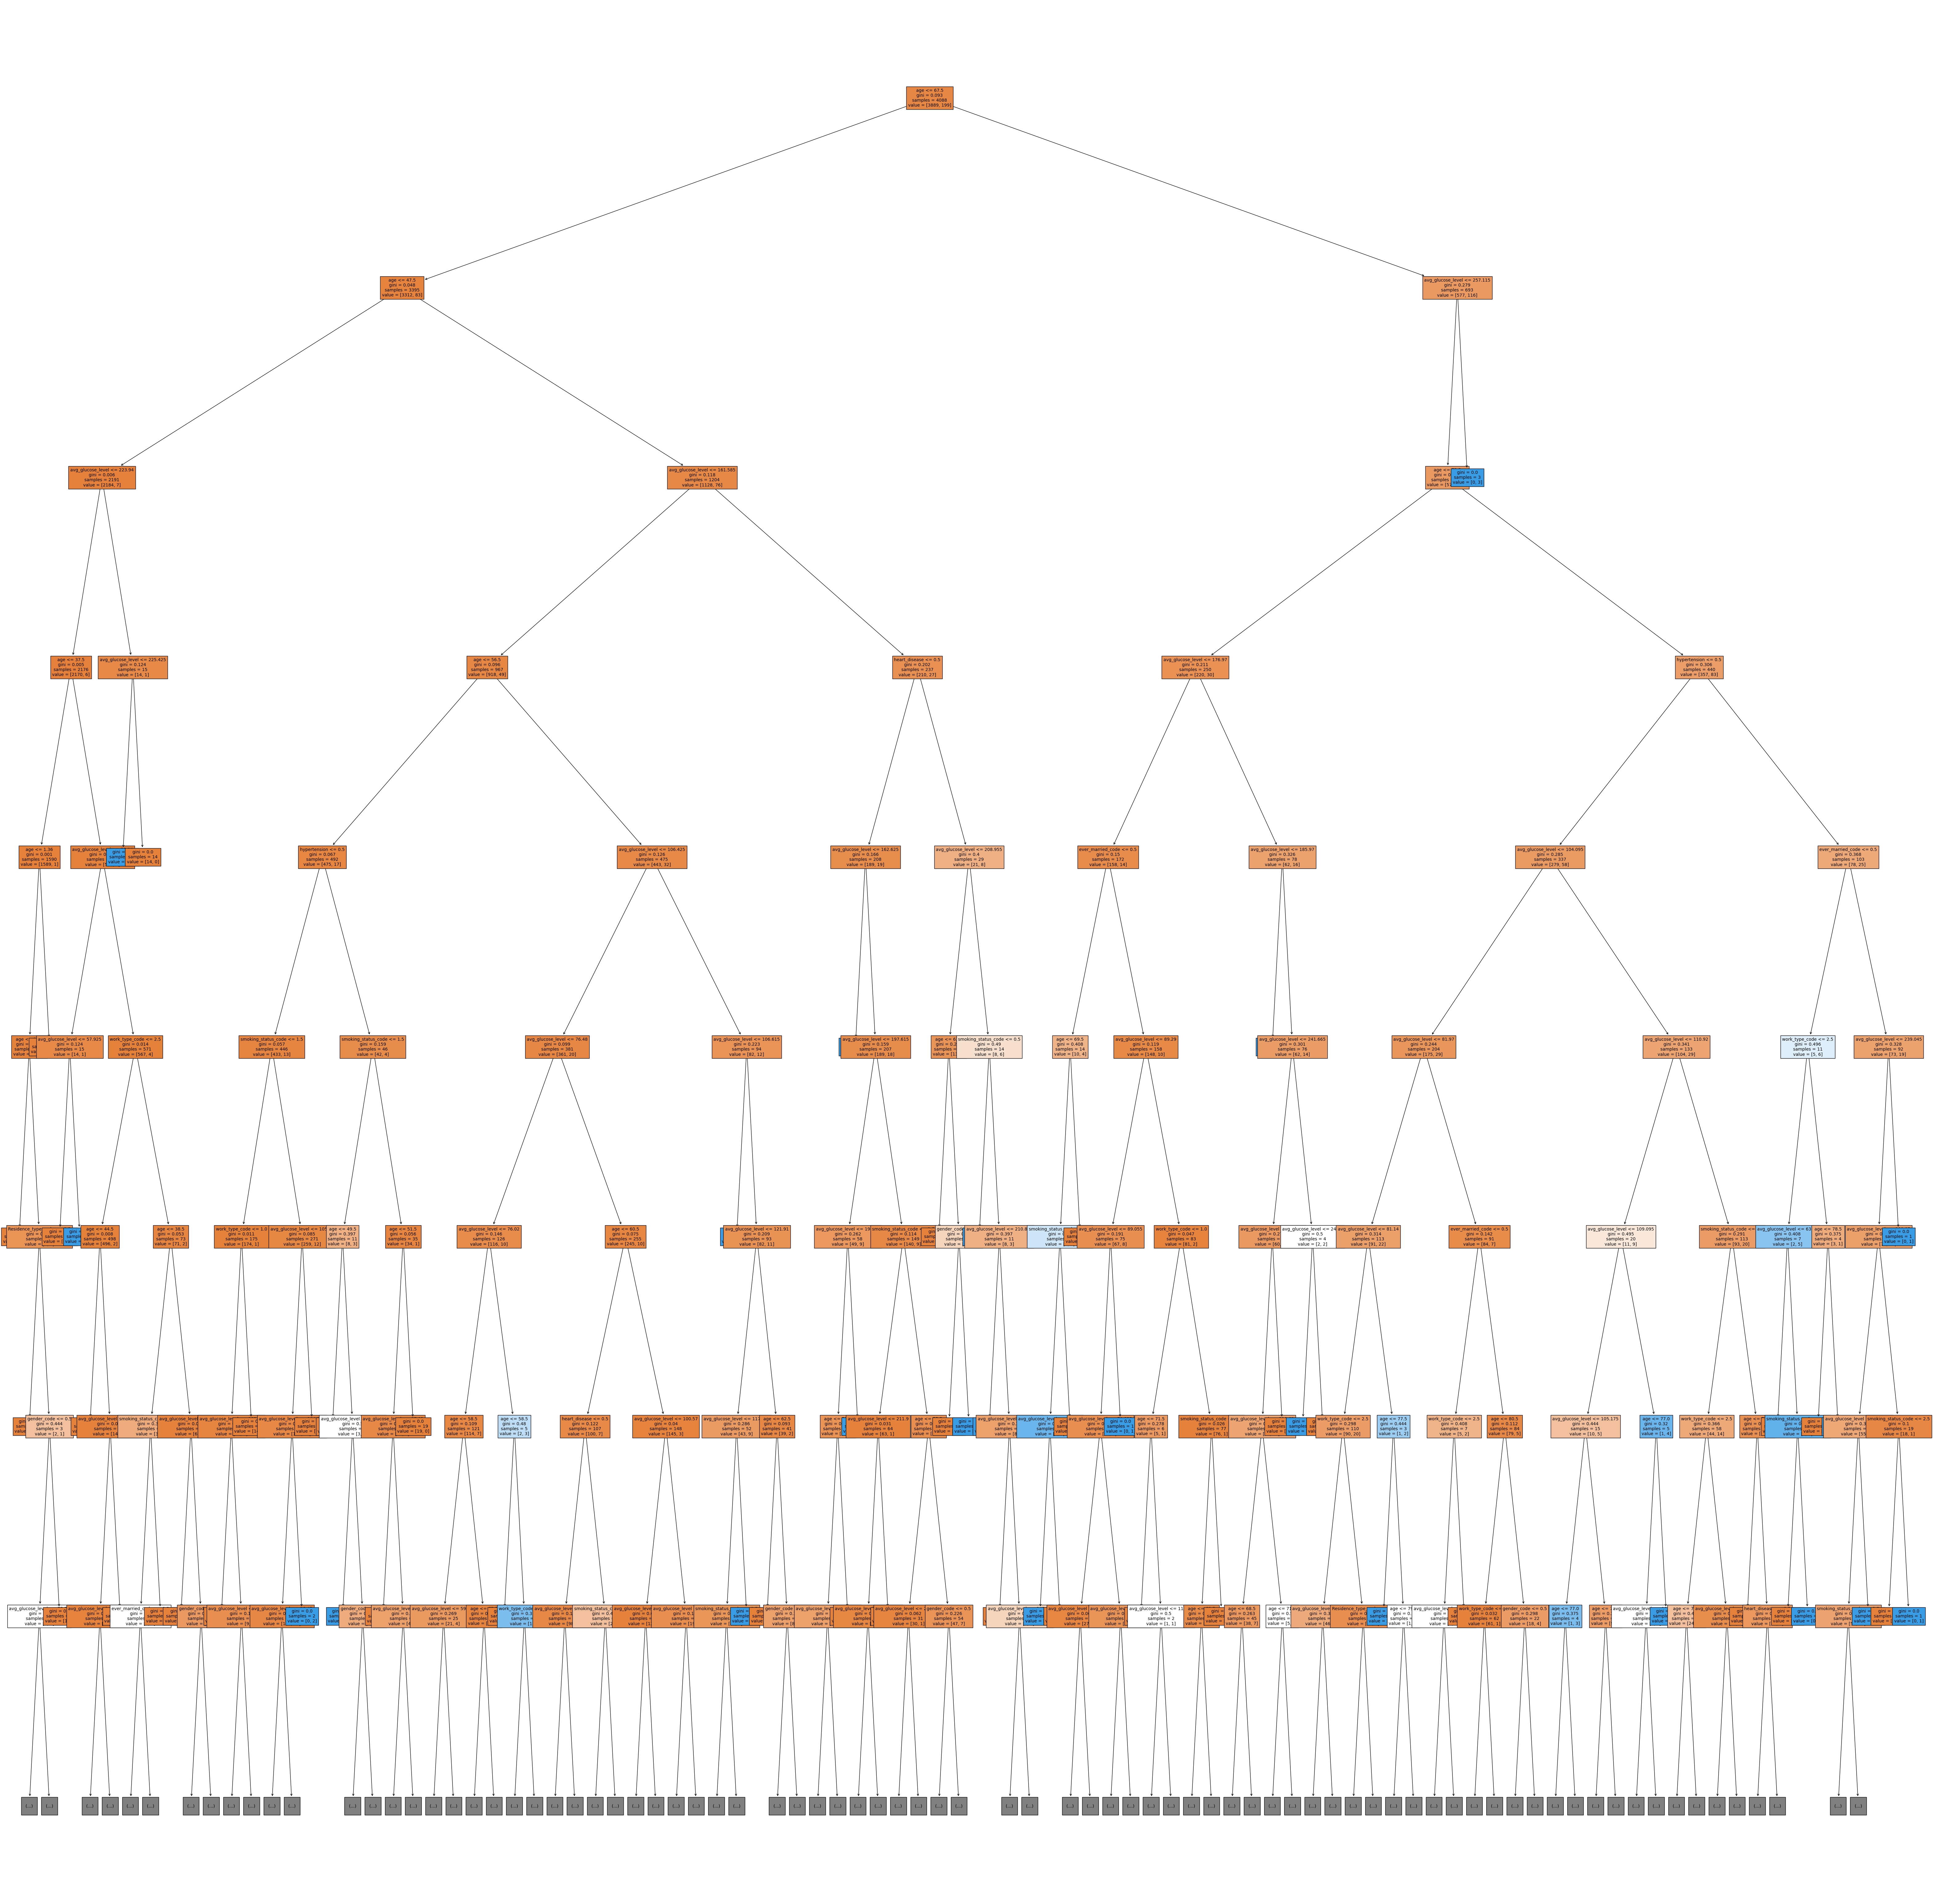

In [22]:
plt.figure(figsize=(80,80))
plot_tree(clf, filled=True, max_depth=8, feature_names=x_dev.columns.to_list(), fontsize=10)

**Prune the tree using cost-complexity pruning.**

In [23]:
path = clf.cost_complexity_pruning_path(x_dev, y_dev)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_dev, y_dev)
    clfs.append(clf)
train_scores = [f1_score(clf.predict(x_dev), y_dev) for clf in clfs] #use f1 score function
test_scores = [f1_score(clf.predict(x_test), y_test) for clf in clfs] #use f1 score function
max_index = test_scores.index(max(test_scores))
print("Alpha value giving the best test performance:", ccp_alphas[max_index])
print("Best test f1-score:", test_scores[max_index])
print(classification_report(clfs[max_index].predict(x_test), y_test))

Alpha value giving the best test performance: 0.00017472742521666202
Best test f1-score: 0.15730337078651685
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       983
           1       0.14      0.18      0.16        39

    accuracy                           0.93      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.94      0.93      0.93      1022



**Examine most important features for the trained tree**

In [24]:
print(x_dev)
print(clfs[max_index].feature_importances_)

       age  hypertension  heart_disease  avg_glucose_level  gender_code  \
845   48.0             0              0              69.21          0.0   
3744  15.0             0              0             122.25          1.0   
4183  67.0             0              0             110.42          0.0   
3409  44.0             0              0              65.41          1.0   
284   14.0             0              0              82.34          1.0   
...    ...           ...            ...                ...          ...   
1434  45.0             0              0              92.86          0.0   
461   16.0             0              0             113.47          0.0   
1052  61.0             0              0              78.65          0.0   
1757  31.0             0              0              74.05          1.0   
5052   6.0             0              0              91.05          0.0   

      ever_married_code  work_type_code  Residence_type_code  \
845                 1.0            

The top 3 most important features for this trained tree are age, average glucose level, and smoking status. These features being the most imporant is explainable because they are the only features that reflect an individual's current health status. It is also important to note that the bmi field was dropped in our model due to NaN values.

##Random Forests

**Train a Random Forest model on the development dataset using the default parameters.**

In [25]:
## YOUR CODE HERE
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_dev, y_dev)
y_test_predict_rfc = rfc.predict(x_test)
print("Random Forest Model Performance")
print(classification_report(y_test, y_test_predict_rfc))
print("Decision Tree Model Performance")
print(classification_report(y_test, y_test_predict))

Random Forest Model Performance
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       0.57      0.08      0.14        50

    accuracy                           0.95      1022
   macro avg       0.76      0.54      0.56      1022
weighted avg       0.94      0.95      0.93      1022

Decision Tree Model Performance
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



**The default random forest model performs better than the default decision tree model that is not pruned. As we can see, the f1-score accuracy, f1-score macro average, and f1-score weighted average are higher for that of the random forest model.**

**Check whether all trees in the trained random forest model have pure leaves**

In [26]:
numNodes = rfc.estimators_[0].tree_.node_count
children_left = rfc.estimators_[0].tree_.children_left
children_right = rfc.estimators_[0].tree_.children_right
impurity = rfc.estimators_[0].tree_.impurity

node_depth = np.zeros(shape=numNodes, dtype=np.int64)
is_leaves = np.zeros(shape=numNodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
leafNodePurity = True
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else: #We have reached the leaf node so check the gini index of node
        is_leaves[node_id] = True
        if impurity[node_id] > 0:
          leafNodePurity = False
          break
if leafNodePurity is False:
  print("The tree does not have all pure leaves")
else:
  print("The tree has all pure leaves")


The tree has all pure leaves


**All the trees in the random forest model has pure leaves. This is because we have used the default paramters for the RandomForestClassifier instance, so the max_depth isn't set. We can verify this by doing a depth-first search through each tree in the forest and checking the impurity of the leaf nodes. An impurity of zero indcates that the leaf node is pure.**

**Select two different hyperparameters to tune and choose 5 different values for each hyperparameters**

In [27]:
## YOUR ANSWER HERE
num_trees = [50, 75, 100, 125, 150]
tree_depth = [None, 2, 4, 6, 8]

**Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters**

In [28]:
highestScore = -1
best_nt = -1
best_depth = -1
best_f1 = -1
for num in num_trees:
  for depth in tree_depth:
    rf = RandomForestClassifier(n_estimators=num, max_depth=depth, oob_score=True, random_state=0)
    rf.fit(x_dev, y_dev)
    score = rf.oob_score_
    if score > highestScore:
      highestScore = score
      best_nt = num
      best_depth = depth
      best_f1 = f1_score(y_test, rf.predict(x_test))
    elif score == highestScore: #if there is a tie in oob score than choose the model that gives the highest f1_score
      if f1_score(y_test, rf.predict(x_test)) > best_f1:
        highestScore = score
        best_nt = num
        best_depth = depth
        best_f1 = f1_score(y_dev, rf.predict(x_dev))

print("Optimal Hyperparameters")
print("Number of Trees:", best_nt)
print("Tree Depth:", best_depth)
rf_optimal = RandomForestClassifier(n_estimators=best_nt, max_depth=best_depth, random_state=0)
rf_optimal.fit(x_dev, y_dev)
y_test_predict_rf_optimal = rf_optimal.predict(x_test)
print("Random Forest Model Performance (Optimal Hyperparameters)")
print(classification_report(y_test, y_test_predict_rf_optimal))
print("Random Forest Tree Model Performance (Plain Vanilla)")
print(classification_report(y_test, y_test_predict_rfc))

Optimal Hyperparameters
Number of Trees: 75
Tree Depth: 6
Random Forest Model Performance (Optimal Hyperparameters)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022

Random Forest Tree Model Performance (Plain Vanilla)
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       0.57      0.08      0.14        50

    accuracy                           0.95      1022
   macro avg       0.76      0.54      0.56      1022
weighted avg       0.94      0.95      0.93      1022



**The performance of the random forest with optimal hyperparameters does not beat that of the plain-vanilla random forest model. Specifically, the values for f1-scores are either the same or lower in the optimal hyperparameter random forest model.**

**Find the top 3 most important features from the Random Forest Model.**

In [29]:
print(x_dev)
print(rf_optimal.feature_importances_)

       age  hypertension  heart_disease  avg_glucose_level  gender_code  \
845   48.0             0              0              69.21          0.0   
3744  15.0             0              0             122.25          1.0   
4183  67.0             0              0             110.42          0.0   
3409  44.0             0              0              65.41          1.0   
284   14.0             0              0              82.34          1.0   
...    ...           ...            ...                ...          ...   
1434  45.0             0              0              92.86          0.0   
461   16.0             0              0             113.47          0.0   
1052  61.0             0              0              78.65          0.0   
1757  31.0             0              0              74.05          1.0   
5052   6.0             0              0              91.05          0.0   

      ever_married_code  work_type_code  Residence_type_code  \
845                 1.0            

**The top 3 most important features in the random forest model with optimal hyperparameters are age, average glucose level, and smoking status in that order. For the pruned decision tree the top 3 most important features in order were average glucose level, age, and smoking status. It is interesting to note that the optimal hyperparameter RF model gave more feature importance to the age and less to the average glucose level.**

##Gradient Boosted Trees

**Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation.**

**Report on the time taken to do model selection for both the models.**

**Also, report the performance of the test
dataset from the optimal models.**

In [30]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "n_estimators":[10, 50, 100, 150]
    }

parameters_2 = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_leaf_nodes":[3, 10, 30]
    }

clf_gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='f1', cv=None, n_jobs=-1)
start_time = time.perf_counter()
clf_gbc.fit(x_dev, y_dev)
end_time = time.perf_counter()
elapsed_time = end_time - start_time

print("GradientBoostingClassifier")
print("Run Time:", elapsed_time, "seconds")
print("Best Parameters:", clf_gbc.best_params_)

y_test_predict_gbt = clf_gbc.predict(x_test)
print(classification_report(y_test, y_test_predict_gbt))

clf_hgbc = GridSearchCV(HistGradientBoostingClassifier(), parameters_2, scoring='f1', cv=None, n_jobs=-1)
start_time = time.perf_counter()
clf_hgbc.fit(x_dev, y_dev)
end_time = time.perf_counter()
elapsed_time = end_time - start_time

print("HistGradientBoostingClassifier")
print("Run Time:", elapsed_time, "seconds")
print("Best Parameters:", clf_hgbc.best_params_)

y_test_predict_hgbt = clf_hgbc.predict(x_test)
print(classification_report(y_test, y_test_predict_hgbt))

GradientBoostingClassifier
Run Time: 194.93547139200018 seconds
Best Parameters: {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.29      0.12      0.17        50

    accuracy                           0.94      1022
   macro avg       0.62      0.55      0.57      1022
weighted avg       0.92      0.94      0.93      1022

HistGradientBoostingClassifier
Run Time: 39.2866222119992 seconds
Best Parameters: {'learning_rate': 0.2, 'max_depth': 8, 'max_leaf_nodes': 30}
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.58      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022



**The three hyperparameters I tuned in the GradientBoostingClassifier were learning rate, max depth, and number of estimators. I felt that these three were very important to the performance of the model on the test set. I also changed the scoring parameter of the GridSearchCV to 'f1' since we are using the f1-score to evaluate this imbalanced dataset. For the HistGradientBoostingClassifier, I tuned the learning rate, max depth, and max leaf nodes for three hyperparameters. Interestingly, the model performance was about the same for both models but the HistGradientBoostingClassifier model took a lot less time to run than the GradientBoostingClassifier model.**

**Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation.**

In [31]:
param_grid = {
    'eta': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth': [2, 3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
}

clf_x = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=10, n_jobs=-1, scoring='f1')
clf_x.fit(x_dev, y_dev)
print("XGBoost")
print("Best Parameters:", clf_x.best_params_)
y_test_predict_xgb = clf_x.predict(x_test)
print(classification_report(y_test, y_test_predict_xgb))

print("GradientBoostingClassifier")
y_test_predict_gbt = clf_gbc.predict(x_test)
print(classification_report(y_test, y_test_predict_gbt))

print("HistGradientBoostingClassifier")
y_test_predict_hgbt = clf_hgbc.predict(x_test)
print(classification_report(y_test, y_test_predict_hgbt))

XGBoost
Best Parameters: {'eta': 0.2, 'max_depth': 10, 'min_child_weight': 1}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.29      0.10      0.15        50

    accuracy                           0.94      1022
   macro avg       0.62      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.29      0.12      0.17        50

    accuracy                           0.94      1022
   macro avg       0.62      0.55      0.57      1022
weighted avg       0.92      0.94      0.93      1022

HistGradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.04      0.07        50

    accuracy                           0.95   

**The performance of the XGBoost model is better than that of the GradientBoostingClassifier and HistGradientBoostingClassifier models. It is clear that the XGBoost model achieves better performance than the other models when predicting the minority class, which in this case is the occurence of a stroke.**


**Find the top 3 features from the trained XGBoost model and compare with those of the Random Forest and Decision Tree.**

In [32]:
print(x_dev)
print(clf_x.best_estimator_.feature_importances_)

       age  hypertension  heart_disease  avg_glucose_level  gender_code  \
845   48.0             0              0              69.21          0.0   
3744  15.0             0              0             122.25          1.0   
4183  67.0             0              0             110.42          0.0   
3409  44.0             0              0              65.41          1.0   
284   14.0             0              0              82.34          1.0   
...    ...           ...            ...                ...          ...   
1434  45.0             0              0              92.86          0.0   
461   16.0             0              0             113.47          0.0   
1052  61.0             0              0              78.65          0.0   
1757  31.0             0              0              74.05          1.0   
5052   6.0             0              0              91.05          0.0   

      ever_married_code  work_type_code  Residence_type_code  \
845                 1.0            

**The top 3 features from the trained XGB model are age, heart disease, and ever married. The top 3 features from the Random Forest and Decision Tree were age, average glucose level, and smoking status. I would trust the Random Forest and Decision Tree models more because I do not think the ever married feature would stongly contribute to a stroke as much as average glucose level or smoking status would. It seems like Random Forest and Decision Tree models are more interpretable than the XGB model.**

**Choose the top 7 features (as given by feature importances from XGBoost) and train the XGBoost model with 10 fold cross-validation.**

In [33]:
## YOUR CODE HERE
feature_imp = clf_x.best_estimator_.feature_importances_
#get indices of top 7 features
indexList = sorted(range(len(feature_imp)), key=lambda i: feature_imp[i])[-7:]
x_dev_copy = x_dev.iloc[:, indexList]
#only keep the top 7 features
x_test_copy = x_test.iloc[:, indexList]
param_grid = {
    'eta': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth': [2, 3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
}
clf_x = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=10, n_jobs=-1, scoring='f1')
clf_x.fit(x_dev_copy, y_dev)
print("XGBoost with top 7 features")
y_test_predict_xgb_7 = clf_x.predict(x_test_copy)
print(classification_report(y_test, y_test_predict_xgb_7))

print("XGBoost with all features")
print(classification_report(y_test, y_test_predict_xgb))

XGBoost with top 7 features
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.22      0.08      0.12        50

    accuracy                           0.94      1022
   macro avg       0.59      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022

XGBoost with all features
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.29      0.10      0.15        50

    accuracy                           0.94      1022
   macro avg       0.62      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022



**The XGB model trained on the top 7 features performs about the same compared to the XGB model in 3.2, which is trained on all features. Training the XGB on the top 7 features in terms of feature importance should have improved performance because we removed the features that minimal importance and correlation to the target variable. In other other words, features like gender and residence type have minimal correlation with the chance of getting a stroke. Therefore, in theory removing those features should have helped. However, these minimally important features probably had extremely low weights in the original XGB model meaning that removing them would not have made a significant difference in performance.**

**Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Decision Tree and Random Forest.**

In [34]:
print("XGBoost with top 7 features")
print(classification_report(y_test, y_test_predict_xgb_7))

print("XGBoost with all features")
print(classification_report(y_test, y_test_predict_xgb))

print("GradientBoostingClassifier")
print(classification_report(y_test, y_test_predict_gbt))

print("HistGradientBoostingClassifier")
print(classification_report(y_test, y_test_predict_hgbt))

print("Random Forest Model Performance (Optimal Hyperparameters)")
print(classification_report(y_test, y_test_predict_rf_optimal))

print("Decision Tree Model Performance (Pruned Tree)")
print(classification_report(y_test, clfs[max_index].predict(x_test)))

XGBoost with top 7 features
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.22      0.08      0.12        50

    accuracy                           0.94      1022
   macro avg       0.59      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022

XGBoost with all features
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.29      0.10      0.15        50

    accuracy                           0.94      1022
   macro avg       0.62      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.29      0.12      0.17        50

    accuracy                           0.94      1022
   macro avg       0.62      0.55      0.57    

With the performance metric being the f1-score, all the models performed somewhat well and were close to each other in terms of performance metric. However, the GradientBoostingClassifier and HistGradientBoostingClassifier models performed the worst. This is because they technically had the worst f1-score with respect to the minority class. This is an important metric because the minority class indicates when a person had a stroke which is a very important label we want to predict. I am very suprised by this result because gradient boosting corrects the errors from the previous tree. The best performing models were the XGBoost model and the pruned decision tree. The difference between the best and worst models were not that much. Historically, I would have chosen the GradientBoostingClassifer model because I believe it should have done the best.

##Calibration

**Estimate the brier score for the XGBoost model scored on the test dataset.**

In [35]:
probs_xgb = clf_gbc.predict_proba(x_test)
# keep the predictions for class 1 only
probs_xgb = probs_xgb[:, 1]
# calculate bier score
loss = brier_score_loss(y_test, probs_xgb)
print("Brier Score Loss")
print(loss)

Brier Score Loss
0.04932041389312241


**Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods. Report brier score after calibration.**

In [36]:
calibrator = CalibratedClassifierCV(clf_gbc, n_jobs=-1)
calibrator.fit(x_dev, y_dev)

CalibratedClassifierCV(estimator=GridSearchCV(estimator=GradientBoostingClassifier(),
                                              n_jobs=-1,
                                              param_grid={'learning_rate': [0.01,
                                                                            0.025,
                                                                            0.05,
                                                                            0.075,
                                                                            0.1,
                                                                            0.15,
                                                                            0.2],
                                                          'max_depth': [3, 5,
                                                                        8],
                                                          'n_estimators': [10,
                                                                           50,
                                                                           100,
                                                                           150]},
                                              scoring='f1'),
                       n_jobs=-1)

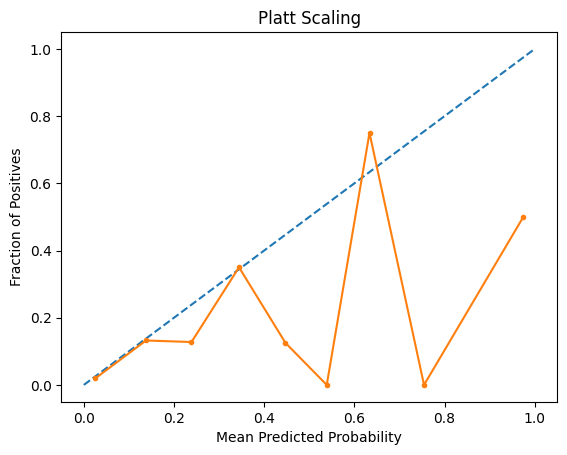

In [37]:
# predict probabilities
probs = calibrator.predict_proba(x_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('Fraction of Positives')
plt.xlabel('Mean Predicted Probability')
plt.title("Platt Scaling")
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()

In [38]:
calibrator_iso = CalibratedClassifierCV(clf_gbc, method='isotonic', n_jobs=-1)
calibrator_iso.fit(x_dev, y_dev)

CalibratedClassifierCV(estimator=GridSearchCV(estimator=GradientBoostingClassifier(),
                                              n_jobs=-1,
                                              param_grid={'learning_rate': [0.01,
                                                                            0.025,
                                                                            0.05,
                                                                            0.075,
                                                                            0.1,
                                                                            0.15,
                                                                            0.2],
                                                          'max_depth': [3, 5,
                                                                        8],
                                                          'n_estimators': [10,
                                                                           50,
                                                                           100,
                                                                           150]},
                                              scoring='f1'),
                       method='isotonic', n_jobs=-1)

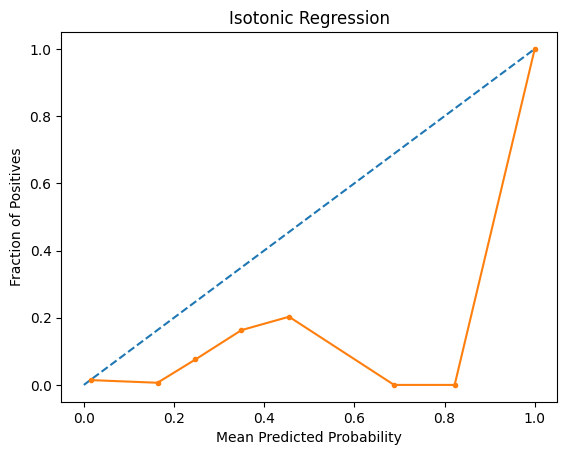

In [39]:
# predict probabilities
probs_iso = calibrator_iso.predict_proba(x_test)[:, 1]
# reliability diagram
fop_iso, mpv_iso = calibration_curve(y_test, probs_iso, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('Fraction of Positives')
plt.xlabel('Mean Predicted Probability')
plt.title("Isotonic Regression")
# plot calibrated reliability
plt.plot(mpv_iso, fop_iso, marker='.')
plt.show()

**Report brier scores from both the calibration methods.**

In [40]:
#PLATT SCALING
# calculate bier score
loss_plat = brier_score_loss(y_test, probs)
print("Platt Scaling Brier Score Loss")
print(loss_plat)

#Isotonic Regression
# calculate bier score
loss_iso = brier_score_loss(y_test, probs_iso)
print("Isotonic Regression Brier Score Loss")
print(loss_iso)

Platt Scaling Brier Score Loss
0.04285711505652527
Isotonic Regression Brier Score Loss
0.04299839487034515


Both of the calibration methods help in having better predicted probabilities. This is because the Brier Score Loss is lower for the Platt Scaling and Isotonic Regression calibration methods.